In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
prices = pd.read_excel("train.xlsx")
prices.index = pd.to_datetime(prices.PRICES)
prices.drop(columns = ["PRICES"], inplace=True)

In [22]:
prices.head()

,Hour 01,Hour 02,Hour 03,Hour 04,Hour 05,Hour 06,Hour 07,Hour 08,Hour 09,Hour 10,...,Hour 15,Hour 16,Hour 17,Hour 18,Hour 19,Hour 20,Hour 21,Hour 22,Hour 23,Hour 24
PRICES,,,,,,,,,,,,,,,,,,,,,
2007-01-01,24.31,24.31,21.71,8.42,0.01,0.01,0.02,0.01,0.01,6.31,...,15.00,10.00,8.17,27.77,37.99,33.11,37.99,33.00,36.48,30.65
2007-01-02,16.01,11.00,9.01,7.50,9.00,7.45,16.50,28.01,29.96,39.60,...,37.57,36.45,37.99,53.00,59.69,50.09,50.00,36.22,31.09,29.84
2007-01-03,28.00,24.50,24.15,18.99,15.50,23.11,29.01,39.73,43.81,49.09,...,43.21,43.99,48.00,57.00,60.99,55.51,51.77,34.51,39.31,38.05
2007-01-04,31.01,28.69,27.00,24.20,12.02,27.00,28.00,34.85,41.31,42.03,...,40.01,38.00,42.66,53.00,58.99,53.50,44.01,35.00,34.46,31.57
2007-01-05,22.00,19.50,17.55,15.91,11.40,22.65,27.30,34.00,40.01,45.00,...,40.06,38.00,38.61,49.84,53.00,45.91,36.74,29.61,30.61,27.51


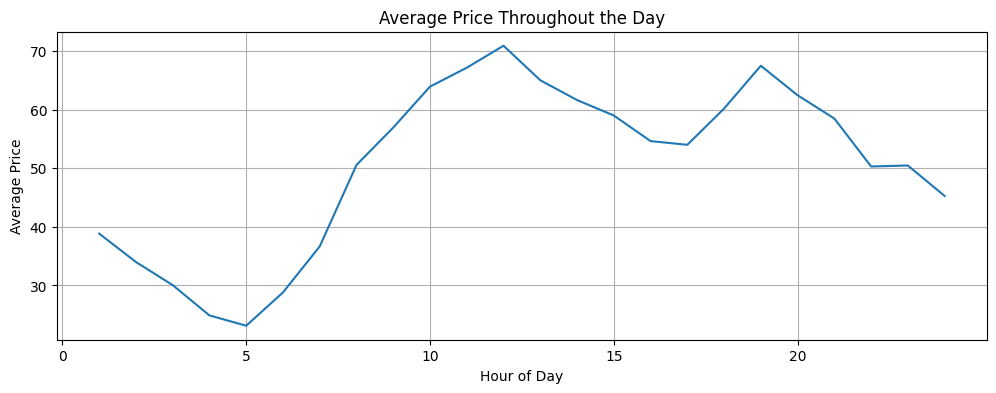

In [23]:
avg_by_hour = prices.mean()

# x-axis as hour numbers 1–24
hours = range(1, 25)

plt.figure(figsize=(12,4))
plt.plot(hours, avg_by_hour.values)
# plt.xticks(hours)
plt.xticks(np.arange(0, 25, 5))

plt.xlabel("Hour of Day")
plt.ylabel("Average Price")
plt.title("Average Price Throughout the Day")
plt.grid()
plt.show()

In [24]:
prices.index = pd.to_datetime(prices.index, format='%Y-%m-%d')

In [25]:
prices['total'] = prices.sum(axis = 1)
prices['day_of_week'] = prices.index.dayofweek

In [26]:
day_prices = prices.groupby('day_of_week').mean()

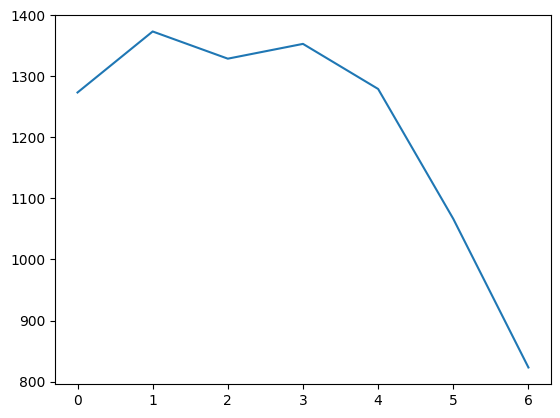

In [27]:
plt.plot(day_prices['total'])

In [28]:
df = pd.read_excel("train.xlsx")
hour_cols = [f'Hour {str(i).zfill(2)}' for i in range(1, 25)]
df_long = df.melt(id_vars=['PRICES'], value_vars=hour_cols, var_name='hour', value_name='price')
df_long['hour'] = df_long['hour'].str[-2:].astype(int)

df_long['PRICES'] = pd.to_datetime(df_long['PRICES'])

daily_df = df_long.groupby('PRICES')['price'].mean().reset_index()
daily_df['day_of_month'] = daily_df['PRICES'].dt.day
daily_df['month'] = daily_df['PRICES'].dt.month
daily_df['day_of_week'] = daily_df['PRICES'].dt.dayofweek 

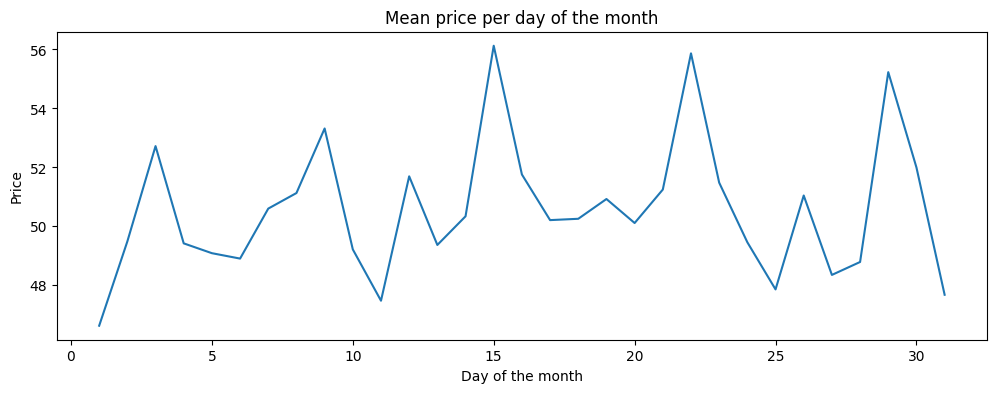

In [29]:
avg_day_of_month = np.array([daily_df.loc[daily_df['day_of_month'] == d, 'price'].mean() for d in range(1,32)])
plt.figure(figsize=(12,4))
sns.lineplot(x=np.arange(1,32), y=avg_day_of_month)
plt.title('Mean price per day of the month')
plt.xlabel('Day of the month')
plt.ylabel('Price')
plt.show()


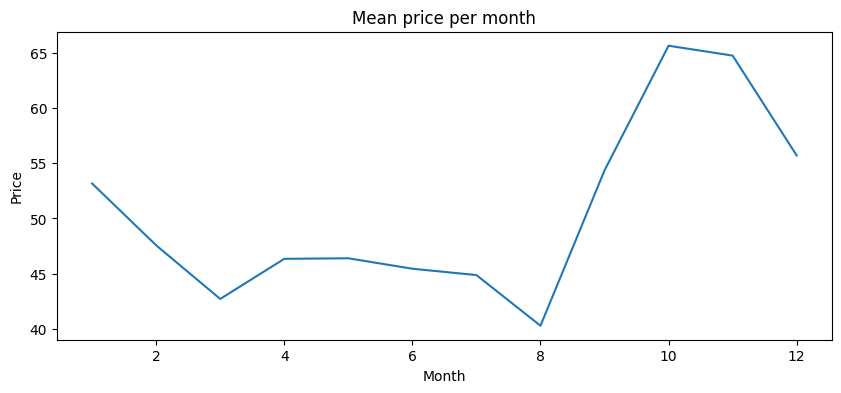

In [30]:
avg_month = np.array([daily_df.loc[daily_df['month'] == m, 'price'].mean() for m in range(1,13)])

plt.figure(figsize=(10,4))
sns.lineplot(x=np.arange(1,13), y=avg_month)
plt.title('Mean price per month')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

In [31]:
daily_df['year'] = daily_df['PRICES'].dt.year
years = np.sort(daily_df['year'].unique())

avg_per_year = np.array([
    daily_df.loc[daily_df['year'] == y, 'price'].mean()
    for y in years
])

avg_per_year

array([41.77785845, 70.61432263, 39.36063242])

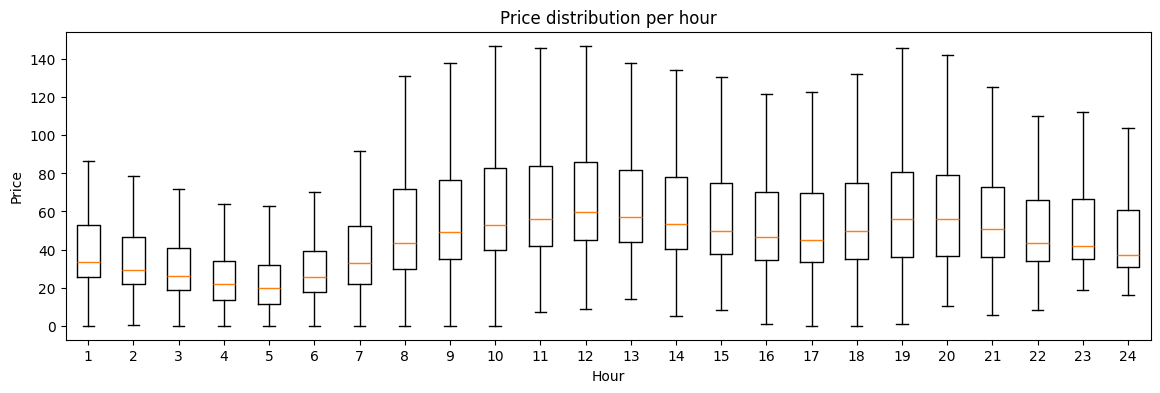

In [32]:
plt.figure(figsize=(14,4))
plt.boxplot(
    [df_long.loc[df_long['hour'] == h, 'price'] for h in range(1,25)],
    positions=range(1,25),
    showfliers=False
)
plt.title('Price distribution per hour')
plt.xlabel('Hour')
plt.ylabel('Price')
plt.xticks(range(1,25))
plt.show()


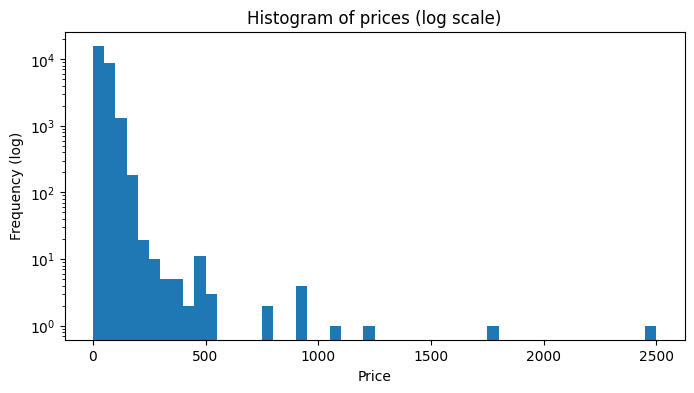

In [33]:
plt.figure(figsize=(8,4))
plt.hist(df_long['price'], bins=50)
plt.yscale('log')
plt.title('Histogram of prices (log scale)')
plt.xlabel('Price')
plt.ylabel('Frequency (log)')
plt.show()


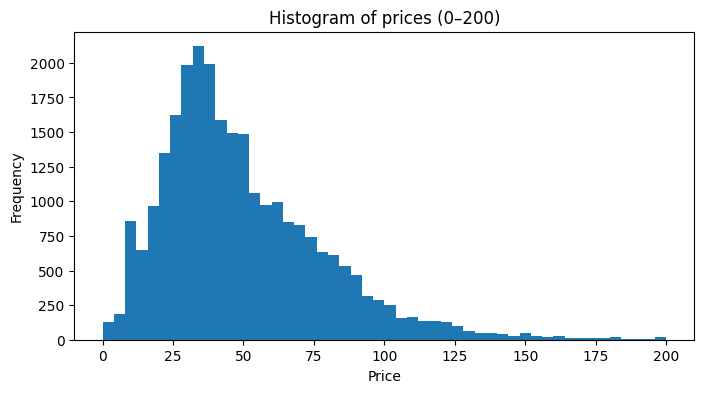

In [34]:
plt.figure(figsize=(8,4))
plt.hist(df_long['price'], bins=50, range=(0, 200))
plt.title('Histogram of prices (0–200)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


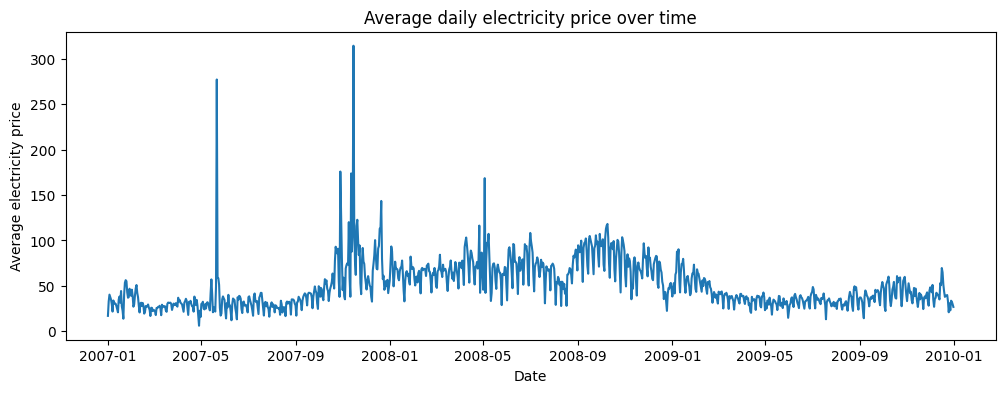

In [35]:
plt.figure(figsize=(12,4))
plt.plot(daily_df['PRICES'], daily_df['price'])
plt.xlabel("Date")
plt.ylabel("Average electricity price")
plt.title("Average daily electricity price over time")
plt.show()

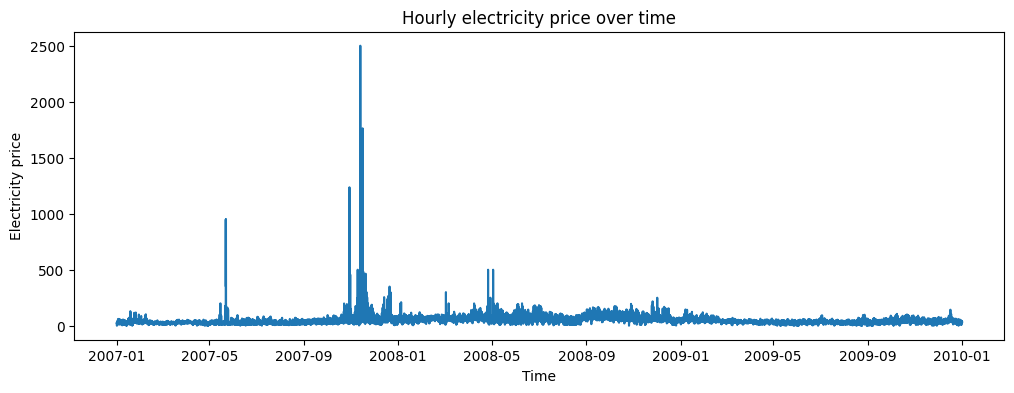

In [36]:
df_long['datetime'] = df_long['PRICES'] + pd.to_timedelta(df_long['hour'] - 1, unit='h')

df_long = df_long.sort_values('datetime')

plt.figure(figsize=(12,4))
plt.plot(df_long['datetime'], df_long['price'])
plt.xlabel("Time")
plt.ylabel("Electricity price")
plt.title("Hourly electricity price over time")
plt.show()


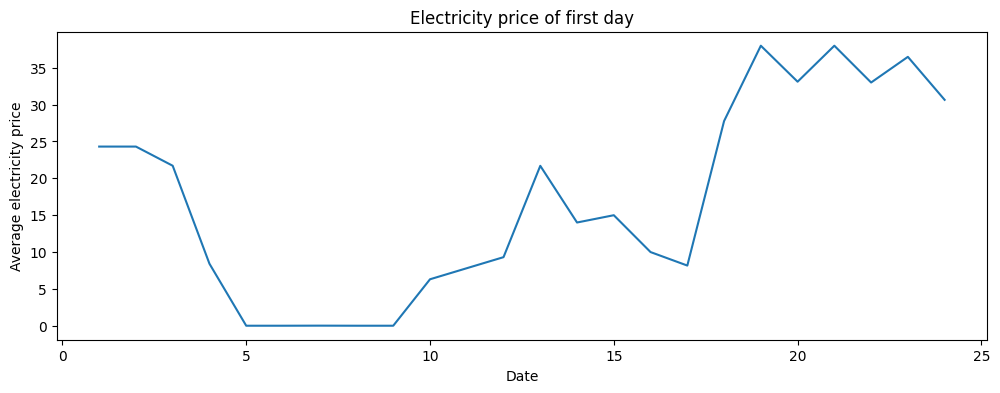

In [37]:
plt.figure(figsize=(12,4))
plt.plot(df_long['hour'][:24], df_long['price'][:24])
plt.xlabel("Date")
plt.ylabel("Average electricity price")
plt.title("Electricity price of first day")
plt.show()

In [38]:
df_long.head()

,PRICES,hour,price,datetime
0,2007-01-01,1,24.31,2007-01-01 00:00:00
1096,2007-01-01,2,24.31,2007-01-01 01:00:00
2192,2007-01-01,3,21.71,2007-01-01 02:00:00
3288,2007-01-01,4,8.42,2007-01-01 03:00:00
4384,2007-01-01,5,0.01,2007-01-01 04:00:00
